### 신경망

계단 함수


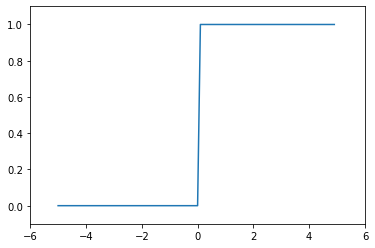

시그모이드(S 모양) 함수


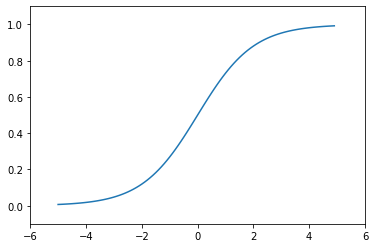

렐루 함수


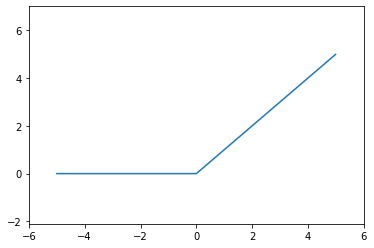

In [41]:
print("계단 함수")
import numpy as np
import matplotlib.pylab as plt

def step_function (x):
    return np.array(x > 0, dtype=int)

x = np.arange( -5.0, 5.0, 0.1 ) # -5 ~ 5 까지 0.1 간격의 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.show()

print("시그모이드(S 모양) 함수")
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange( -5.0, 5.0, 0.1 )
y = sigmoid(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.show()


print("렐루 함수")
def relu(x):
    return np.maximum(0, x) # 둘 중 큰값을 반환

x = np.arange(-5.0, 5.0, 0.01)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-2.1, 7,1)
plt.show()


In [64]:
print("다 차원 배열의 계산")
A = np.array([ 1, 2 ,3, 4, 5, 6, 7 ])
np.ndim(A) # 배열의 차원
a = A.shape  # 배열의 크기로 튜플을 반환
print(a)
A.shape[0] # 배열의 튜플 원소

B = np.array([ [1, 2], [2, 3], [3, 4] ]) # 3x2
print(B)
print(np.ndim(B))
print(B.shape)

C = np.array([ [3, 10, 12], [20, 10, 12] ]) # 2x3
np.dot(B, C)

print("testing 브로드케스트")
D = np.array([ 1, 2, 3 ]) # ?x3
np.dot(C, D)

다 차원 배열의 계산
(7,)
[[1 2]
 [2 3]
 [3 4]]
2
(3, 2)
testing 브로드케스트


array([59, 76])

In [67]:
print("신경망에서의 행렬 곱")
# XW = Y
X = np.array([ 1, 2 ]) # 1x2
W = np.array([ [2, 3], [10, 20] ]) # 2x3

Y = np.dot(X, W)
Y

신경망에서의 행렬 곱


array([22, 43])

In [76]:
print("3층 신경망 구현")
# A = XW + B
X = np.array([ 1, 1.5 ]) # 1 x 2

# 1차 은닉층
W = np.array([ [0.2 , 0.3, 0.1], [0.4, 0.2, 0.6] ]) # 2 x 3
B = np.array([ 0.1, 0.2, 0.3 ])
A = np.dot(X, W) + B
print("A :", A)

# 활성화 함수 = sigmoid
R1 = sigmoid(A)
print("R1 :", R1) # 1 x 3

# 2차 은닉층
W2 = np.array([ [0.1, 0.2], [0.3, 0.4], [0.2, 0.9] ]) # 3 x 2
B2 = np.array([ 0.1, 0.2 ])

A2 = np.dot(R1, W2) + B2
R2 = sigmoid(A2) # 1 x 2
print("R2 :", R2)

print("항등 함수를 사용한 출력층")
def identify_function(x):
    return x

W3 = np.array([ [0.1, 0.3], [0.2, 0.5] ]) # 2 x 2
B3 = np.array([ 0.1, 0.2 ]) # 1 x 2

A3 = np.dot(R2, W3) + B3
R3 = identify_function(A3)
print("R3 :", R3)

3층 신경망 구현
A : [0.9 0.8 1.3]
R1 : [0.7109495  0.68997448 0.78583498]
R2 : [0.63070776 0.79008389]
항등 함수를 사용한 출력층
R3 : [0.32108755 0.78425427]


In [80]:
print("신경망 네트워크 함수")

def init_network():
    network = {}

    network["W1"] = np.array([ [0.2 , 0.3, 0.1], [0.4, 0.2, 0.6] ]) # 2 x 3
    network["W2"] = np.array([ [0.1, 0.2], [0.3, 0.4], [0.2, 0.9] ]) # 3 x 2
    network["W3"] = np.array([ [0.1, 0.3], [0.2, 0.5] ]) # 2 x 2
    network["B1"] = np.array([ 0.1, 0.2, 0.3 ])
    network["B2"] = np.array([ 0.1, 0.2 ])
    network["B3"] = np.array([ 0.1, 0.2 ]) # 1 x 2

    return network

def forword(network, X):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    B1, B2, B3 = network["B1"], network["B2"], network["B3"]

    A1 = np.dot(X, W1) + B1
    R1 = sigmoid(A1)
    A2 = np.dot(R1, W2) + B2
    R2 = sigmoid(A2)
    A3 = np.dot(R2, W3) + B3
    y = identify_function(A3)

    return y

network = init_network()
X = np.array([ 1.0, 0.5 ])
y = forword(network, X)
print(y)

신경망 네트워크 함수
[0.31513844 0.76884647]


In [96]:
print("소프트맥스 함수 구현")
a = np.array([ 0.1, 2.2, 1.4 ])
def softmax(a):
    c = np.max(a) # 오버 플로우를 감안한 소프트 맥수 함수 구현
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y
softmax(a)

print("소프트맥스 함수 출력 배열의 원소는 항상 0 ~ 1 사이의 실수")
print("소프트맥수 함수 출력 배열 원소의 합은 항상 1이다")
y = softmax(a)
print("출력값: ", y)
print("출력 원소의 합 :", np.sum(y))

소프트맥스 함수 구현
소프트맥스 함수 출력 배열의 원소는 항상 0 ~ 1 사이의 실수
소프트맥수 함수 출력 배열 원소의 합은 항상 1이다
출력값:  [0.07790913 0.63621917 0.2858717 ]
출력 원소의 합 : 1.0
